In [13]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from mygame_functions import GameSimulationVirtualGain

In [20]:
emes = [(4 + i) for i in range(7)]
enes = [101,151]

In [21]:
np.array(alpha)

array([ 0.10596026,  0.15841584,  0.21192053,  0.31683168,  0.42384106,
        0.63366337,  0.84768212,  1.26732673,  1.69536424,  2.53465347,
        3.39072848,  5.06930693,  6.78145695, 10.13861386])

In [22]:
alpha = []
GREAL = []
GVIRT = []
SREAL = []
SVIRT = []
numponderas = 100
imprimecada = 50

In [23]:
for N in enes:
    for M in emes:
        alpha.append(2**M / N)
        print("        ----------------------")
        print("        M = {}        ({}/{})".format(M, emes.index(M)+1, len(emes)))
        print("        ----------------------")
        print('               N = {}        ({}/{})'.format(N,enes.index(N) + 1, len(enes)))
        print('               α = {:.3f}'.format(alpha[-1]))
        greal = 0
        gvirt = 0
        scoreal = 0
        scovirt = 0
        for i in range(numponderas):
            real_gains, virtual_gains, score_real, score_virt = GameSimulationVirtualGain(N, M, T=10000)
            greal += np.mean(real_gains)
            gvirt += np.mean(virtual_gains)
            scoreal += np.mean(score_real)
            scovirt += np.mean(score_virt)
            if (i + 1) % imprimecada == 0:
                print('       ----> Ponderacion nº {}/{}'.format(i + 1, numponderas))
                print('       α = {:.3f}'.format(alpha[-1]))
                print('             <Greal> = {:.4f}'.format(greal / (i + 1)))
                print('             <Gvirt> = {:.4f}'.format(gvirt / (i + 1)))
                print('      <maxSCOREreal> = {:.4f}'.format(scoreal / (i + 1)))
                print('      <maxSCOREvirt> = {:.4f}'.format(scovirt / (i + 1)))
        GREAL.append(greal / numponderas)
        GVIRT.append(gvirt / numponderas)
        SREAL.append(scoreal / numponderas)
        SVIRT.append(scovirt / numponderas)

GREAL = [x for _, x in sorted(zip(alpha, GREAL))]
GVIRT = [x for _, x in sorted(zip(alpha, GVIRT))]
SREAL = [x for _, x in sorted(zip(alpha, SREAL))]
SVIRT = [x for _, x in sorted(zip(alpha, SVIRT))]
alpha.sort()

        ----------------------
        M = 4        (1/7)
        ----------------------
               N = 101        (1/2)
               α = 0.158
       ----> Ponderacion nº 50/100
       α = 0.158
             <Greal> = -0.0001
             <Gvirt> = -0.0001
      <maxSCOREreal> = -0.0001
      <maxSCOREvirt> = 0.0001
       ----> Ponderacion nº 100/100
       α = 0.158
             <Greal> = -0.0002
             <Gvirt> = -0.0001
      <maxSCOREreal> = -0.0000
      <maxSCOREvirt> = 0.0001
        ----------------------
        M = 5        (2/7)
        ----------------------
               N = 101        (1/2)
               α = 0.317
       ----> Ponderacion nº 50/100
       α = 0.317
             <Greal> = -0.0000
             <Gvirt> = -0.0000
      <maxSCOREreal> = 0.0004
      <maxSCOREvirt> = 0.0027
       ----> Ponderacion nº 100/100
       α = 0.317
             <Greal> = -0.0000
             <Gvirt> = -0.0000
      <maxSCOREreal> = 0.0003
      <maxSCOREvirt> = 0.0010


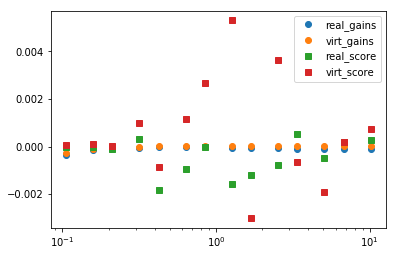

In [24]:
plt.xscale('log')
plt.plot(alpha, GREAL, 'o', label = 'real_gains')
plt.plot(alpha, GVIRT, 'o', label = 'virt_gains')
plt.plot(alpha, SREAL, 's', label = 'real_score')
plt.plot(alpha, SVIRT, 's', label = 'virt_score')
plt.legend()

In [ ]:
file_name = "GAINS_GAINSPYvsALPHA_final"
with open('{}.dat'.format(file_name), 'w') as file:
    for i in range(len(GSsum)):
        file.write('{} {} {}\n'.format(alphasum[i], GSsum[i], GSPYsum[i]))

In [ ]:
alphasum = []
GSsum = []
GSPYsum = []
file_name = "GAINS_GAINSPYvsALPHA_final"
with open('{}.dat'.format(file_name), 'r') as file:
    for line in file:
        value = line.split()
        value[2].split('\n')
        alphasum.append(float(value[0]))
        GSsum.append(float(value[1]))
        GSPYsum.append(float(value[2]))

In [ ]:
fig, ax = plt.subplots(figsize=(10, 8))
#ax[0].set_facecolor('xkcd:eggshell')

ax.set(xscale='log')#, ylim=[-1,1])
ax.set_ylabel(r"<$G_i$>", fontsize='large')
ax.set_xlabel(r'$\alpha$', fontsize='x-large')
ax.tick_params(which='both', length=5, width = 2, direction = 'inout', 
                  labelbottom=True, labeltop=False, labelleft=True, labelright=False,
                  bottom=True, top=True, left=True, right=True)

ax.xaxis.set_major_formatter(
    ticker.FuncFormatter(lambda x, pos: ('{{:.{:1d}f}}'.format(
        int(np.maximum(-np.log10(x), 0)))).format(x)))

ax.axhline(y=0, color='k', alpha = .7, linestyle='--')

lin0, = ax.plot(alphasum[1:], GSPYsum[1:], lw=1.5, ls = '-', color = 'red', alpha=.6)
mark0, = ax.plot(alphasum[1:], GSPYsum[1:], ls = '', marker='o', mew = '1.5', ms = 6, alpha=.8, mec='red', mfc='w')

lin, = ax.plot(alphasum[1:], GSsum[1:], lw=1.5, ls = '-', color = 'k', alpha=.6)
mark, = ax.plot(alphasum[1:], GSsum[1:], ls = '', marker='s', mew = '1.5', ms = 6, alpha=.8, mec='midnightblue', mfc='w')


labels = ['Spy', 'Spied']
ax.legend([(lin0, mark0), (lin, mark)], labels, loc=0)

ax.hlines(y=-.9, xmin=.25, xmax = 8, color='k', alpha = .5, linestyle=':')
ax.hlines(y=-.15, xmin=.25, xmax = 8, color='k', alpha = .5, linestyle=':')
ax.vlines(x=.25, ymin =-.9 , ymax =-.15 , color='k', alpha = .5, linestyle=':')
ax.vlines(x=8, ymin =-.9 , ymax =-.15 , color='k', alpha = .5, linestyle=':')